In [1]:
import pandas as pd
import numpy as np
import prepare as prep
import explore as ex
import modeling as mod
import warnings
warnings.filterwarnings('ignore')

# Project Description:  
Board games are loved by everyone, young and old. They are something that brings people together for countless hours of social lesiure. The only thing better than the time spent with friends and family is enjoying the game you are playing while doing it. With so many choices and competition in the industry, how can a company produce an enjoyable game and become a favorite of those who play it? The board game industry has produced such games before, but what if there was a recipe for creating a board game that people will love? In 2022 the board game market was worth about $3.13 billion. With that much money being spent for board games, I will be using data to see if there is a popular commonality among highly rated board games and develop a recipe of features to build the next top rated board game.

# Project Goals:  
* Identify drivers of highly rated board games
* Build a model to accurately predict if a board game will have achieve a high rating.
* Conduct an NLP analysis for game descriptions and mechanics
* Provide stakeholders with a recipe to create a highly rated board game.

# Executive Summary:
1. There were no features found that indicate if a board game would rank high (top 10%) other than number of distributors.
2. There are similar mechanics for higher and lower rated games, but there are some differences.
3. The descriptions of the games indicate that there may be a certain set of elements in a board game that are more popular.

| Feature | Definition |
|:--------|:-----------|
|id| The id number of the game|
|name| The name of the game|
|price| The lowest current available price for the game|
|msrp| Manufacturer suggested retail price|
|year_published| The year the game was made|
|min_players| Minimum number of players required to play the game|
|max_players| The maximum number of players that can play the game|
|min_playtime| The manufacturers estimated minimum time to play the game|
|max_playtime| The manufacturers estimated maximum time to play the game|
|min_age| The recommended minimum age required to play the game|
|num_user_ratings| The number of user ratings the game has recieved on boardgameatlas|
|average_user_rating| The average rating (1-5) the game has recieved from the users|
|num_user_complexity_votes| The average rating (1-5) of the games complexity as rated by the users|
|average_learning_complexity| The average rating (1-5) of the games learning complexity as rated by the users|
|average_strategy_complexity| PThe average rating (1-5) of the games strategy complexity as rated by the users|
|rank| The rank of the game|
|type| Either 'game', 'expansion', or 'accessory' indicating the type of product|
|num_distributors| The number of distributors of the game|

# Prepare

In [2]:
# a brief look at the data
df=prep.explore_df()
df.head(3)

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
0,TAAifFP590,Root,45.00,60.0,2018.0,2.0,4.0,60.0,90.0,10.0,412,4.059395,11,3.818182,3.636364,1,game,6
1,yqR4PtpO8X,Scythe,54.39,90.0,2016.0,1.0,5.0,90.0,120.0,14.0,763,4.213439,17,3.117647,3.235294,2,game,9
2,5H5JS0KLzK,Wingspan,50.00,60.0,2019.0,1.0,5.0,40.0,70.0,10.0,589,4.162919,12,2.500000,2.833333,3,game,11


## Data preperation for exploration:
* The top 10% of games will be considered "high rated" games
* The 'type' column was encoded into a 0, 1, or 2 for 'game', 'expansion', and 'accessory' respectively

In [3]:
# data prepared for exploration
df=ex.explore_data()

In [4]:
# data split into train, validate, and test. Stratified on 'rank'
train, val, test = ex.tts(df, 'rank')
train.shape, val.shape, test.shape

((716, 18), (179, 18), (100, 18))

# Explore

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the num_distributors of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average num_distributors of higher rated games and other games</dd>
        <dd>- $H_a$: The average num_distributors of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

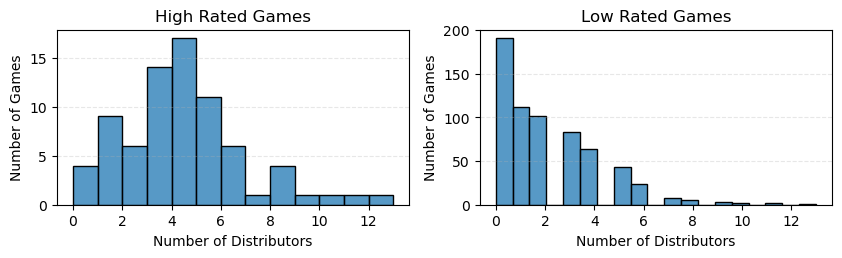

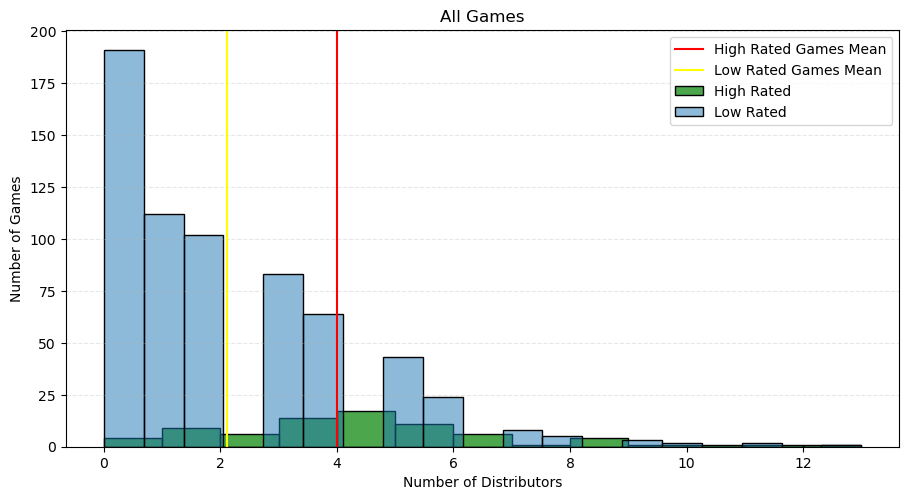

In [5]:
# plots for the comparison of means for the number of distributors
ex.q9_plots(train)

In [6]:
# Statistical test (two tailed t-test) for number of distributors
ex.q9_statistic(train)

The p-value (1.5364921060137039e-12) is lower than the alpha (0.05) so we reject the null hypothesis.


## Statistical Analysis:
* Statistically, number of distributors was the only feature that a company would be able to control that was found to be significant

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>What are the top mechanics among high rated games and low rated games?</dt>
    </dl>
</div>

In [7]:
# top mechanics of all games
ex.top_mechanics()

mechanics                    
Hand Management                  375
Dice Rolling                     262
Variable Player Powers           257
Set Collection                   247
Card Drafting                    228
Cooperative Play                 145
Tile Placement                   143
Area Control                     124
Worker Placement                 123
Modular Board                    121
Grid Movement                     89
Deck Building                     87
Press Your Luck                   75
Network and Route Building        73
Area Majority/ Influence          72
Solo / Solitaire Game             71
Action Point Allowance System     69
Take That                         66
Area Movement                     66
Point to Point Movement           62
dtype: int64

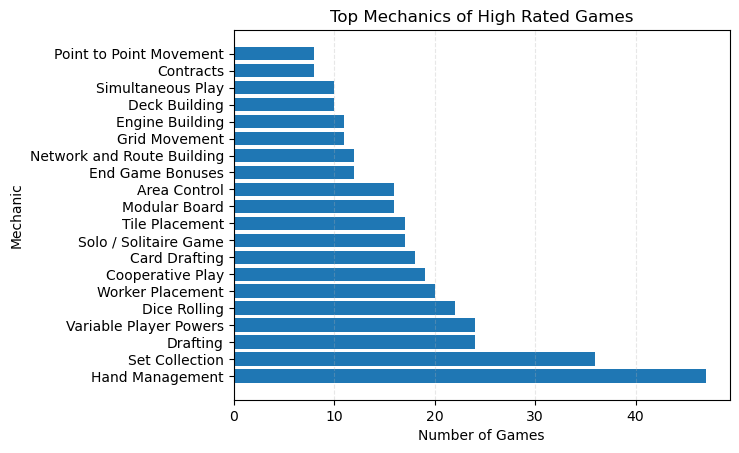

In [8]:
# plot to show top 20 mechanics in high rated games
ex.top_mech_plt()

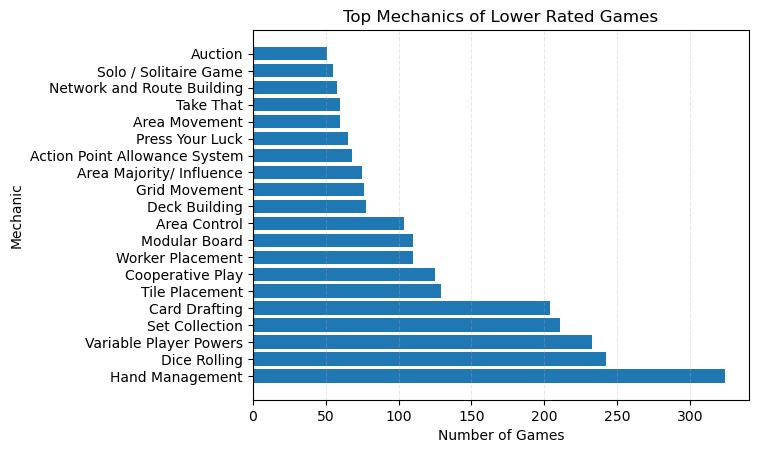

In [9]:
# plot to show top 20 mechanics in lower rated games
ex.low_mech_plt()

## These are the top 20 mechanics for the top 100 and >100 games.  
Higher rated games seem to favor and reward more skill based play instead of relying on luck and hindering other players. Higher rated games also seem to stay away from area movement and other area based playstyles like majority/influence; they prefer point to point and grid movement even though grid movement is shared between the two groups. These are the most notable differences with other minor differences.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>When exploring the game descriptions:</dt>
        <dd>- What are the top <strong>bigrams</strong> of high and low rated games?</dd>
        <dd>- What are the top <strong>trigrams</strong> of high and low rated games?</dd>
    </dl>
</div>

In [10]:
# showing top bigrams and trigrams of high and low rated games
ex.compare_descriptions()

High rated games' bigrams:
 (victori, point)    21
(game, player)      18
(win, game)         14
(player, take)      13
(card, player)      11
dtype: int64 

Low rated games' bigrams:
 (player, take)      113
(game, player)      101
(board, game)        90
(victori, point)     81
(card, game)         76
dtype: int64 

High rated games' trigrams:
 (player, take, role)    7
(point, end, game)      5
(betray, hous, hill)    5
(spiel, de, jahr)       4
(year, 2004, -)         4
dtype: int64 

Low rated games' trigrams:
 (player, take, role)    46
(player, take, turn)    22
(two, four, player)     15
(point, end, game)      13
(1, game, board)        12
dtype: int64


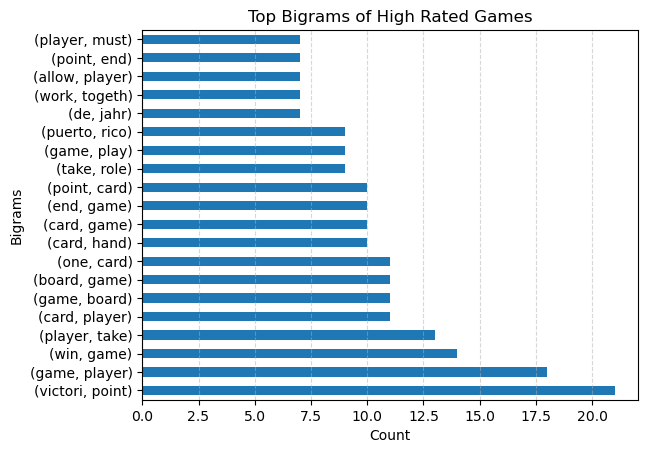

In [11]:
# plot to show the top 20 bigrams of high rated games
ex.high_bigrams()

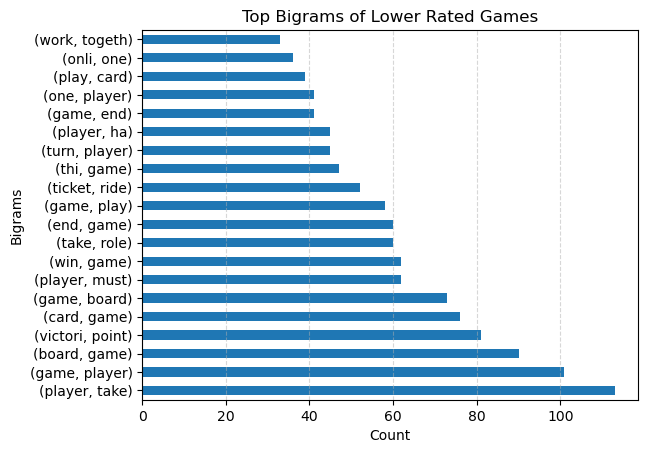

In [12]:
# plot to show the top 20 bigrams of lower rated games
ex.low_bigrams()

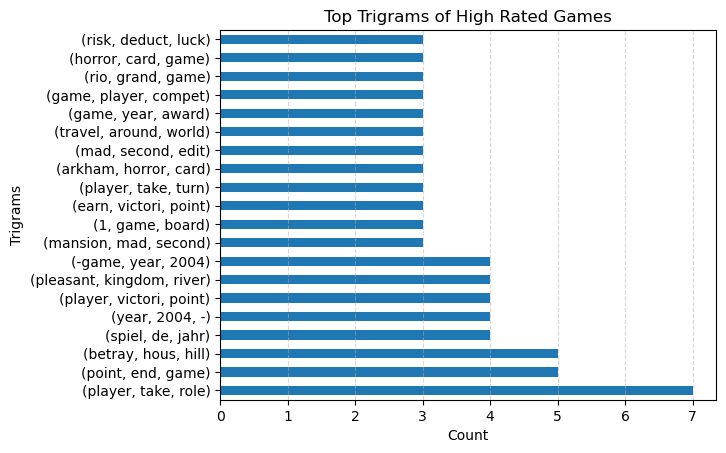

In [13]:
# plot to show the top trigrams of high rated games
ex.high_trigrams()

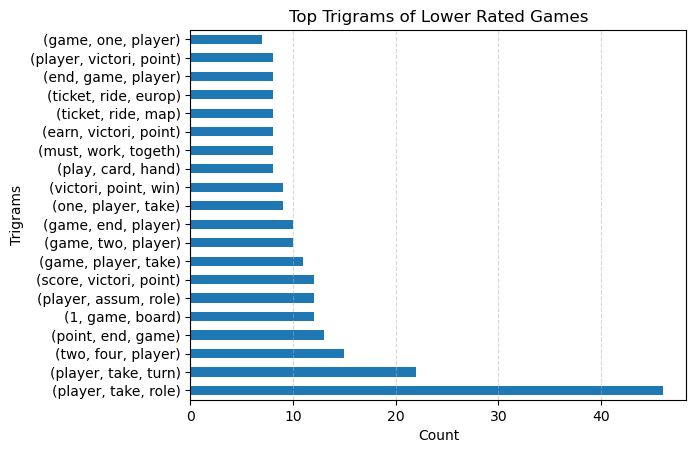

In [14]:
# plot showing lower rated trigrams
ex.low_trigrams()

<div class="alert alert-info">
    <header>
    <h2>Exploration Summary</h2>
    </header>
    <dl>
        <dt>In the bigrams, there is not a significant difference between high and low rated games. However in the trigrams, there are several that mention 'horror' in the higher rated games. Horror is a more adult genre which may imply the demographics of people that buy these games, but there was no significance in the minimum age between higher rated and lower rated games. My overall recommendation based on all the data would be to examine the aspects of the horror genre and incorperate those aspects. For example, horror includes elements of survival, escaping, beating a villian, teamwork, finding items/building an inventory, characters with different skills, etc. All these horror aspects can also relate to the top mechanics of higher rated games. There are also mentions of specific years both in German and English. No other data supports this being a high rated characteristic of a game, but is maybe an indication of having a specific setting versus a vague one. It is also important to have at least 4 distributors based on the statistical tests.</dt>
    </dl>
</div>

# Modeling
* For modeling I dropped all the features that had no predictive value for the model:
    * id
    * name
    * 

In [15]:
train, val, test= mod.modeling_df(df)

In [16]:
train.head(3)

,price,msrp,min_players,max_players,min_playtime,max_playtime,min_age,rank,type,num_distributors
386,45.456444,41.49,2.0,4.0,60.0,75.0,10.0,0,0,0
623,48.000000,65.00,1.0,4.0,45.0,90.0,10.0,0,0,0
781,235.400000,89.99,3.0,5.0,120.0,120.0,14.0,0,0,1


In [17]:
mod.models(train, val)

,model,train_accuracy,validate_accuracy,difference
2,KNeighborsClassifier,0.898045,0.899441,-0.001397
3,DecisionTreeClassifier,0.893855,0.921788,-0.027933
4,RandomForestClassifier,0.893855,0.921788,-0.027933
0,LogisticRegression (lbfgs),0.891061,0.921788,-0.030726
1,LogisticRegression (liblinear),0.891061,0.921788,-0.030726
